<a href="https://colab.research.google.com/github/CsonVass/raman/blob/main/DissolutionFromRaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [2]:
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

In [3]:
# !cat /proc/cpuinfo

In [4]:
# !pip install -q keras
# !pip install -q scikit-learn==0.23.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
# hpmcMaps = []
# dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Raman/hpmc/c/DR_C01A-component-2.csv', header=None)


In [7]:
map_curve_pairs = {}
missing = []
path_to_hpmc = '/content/drive/MyDrive/Colab Notebooks/Raman/maps'

dir_list = os.listdir(path_to_hpmc)
for f in dir_list: 
  path_to_map = path_to_hpmc + '/' + f
  map_name = f.split('-')[0].split('_')[1]
  map_curve_pairs[map_name] = {}
  map_csv = pd.read_csv(path_to_map, header=None)
  if len(map_csv.index) == 1:
    tmp = []
    for i in range(0, 31*31, 31):
      tmp.append([map_csv.iloc[0:1, i:i+31].values])
    map_csv = pd.DataFrame(tmp)
  map_curve_pairs[map_name]['map'] = tf.reshape(tf.convert_to_tensor(map_csv, tf.float32), [31, 31])

dissolutionCureves = []
curves_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Raman/Tablettak_minden_adat.csv', header=None)
names = curves_csv.iloc[0:1, 1:]
time = curves_csv.iloc[4:,0:1]
curve_points = curves_csv.iloc[4:,1:].apply(lambda x: x.str.replace(',','.'))
for i in range(len(curve_points.columns)):
    curve_i = curve_points.iloc[:, i:i+1]
    if(names.iloc[0,i] in map_curve_pairs):
      map_curve_pairs[names.iloc[0,i]]['curve'] = tf.reshape(tf.convert_to_tensor(curve_i, tf.float32), [1, 37])
    else: 
      missing.append(names.iloc[0,i])

mcp_cpy = map_curve_pairs.copy()
for name in mcp_cpy:
  if not 'curve' in map_curve_pairs[name] or len(map_curve_pairs[name]['map']) != 31:
    missing.append(map_curve_pairs[name])
    map_curve_pairs.pop(name)  

In [8]:
x = []
y = []
keys = []

for key in sorted(map_curve_pairs):
 x.append(map_curve_pairs[key]['map'])
 y.append(map_curve_pairs[key]['curve'])

y = [y_ / 100 for y_ in y]


x_train, x_test, y_train, y_test = train_test_split(x, y)

# x_train = tf.convert_to_tensor(x_train)
# y_train = tf.convert_to_tensor(y_train)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [9]:
print(y_train.shape)
y_train = y_train.reshape((108, 37))
print(y_test.shape)
y_test = y_test.reshape((36, 37))

(108, 1, 37)
(36, 1, 37)


In [10]:
# import cv2

# cv2.imwrite("image.jpg", np.asarray(x[0]))
# cv2.imwrite("imagey.jpg", np.asarray(y[0]))

In [11]:
# img = cv2.imread("image.jpg")
# imgy = cv2.imread("imagey.jpg")

In [12]:
# height, width, _ = img.shape
# heighty, widthy, _ = imgy.shape
# height, width, heighty, widthy

In [13]:
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Conv2D(31, (3,3), activation=tf.nn.relu))
# model.add(tf.keras.layers.Conv2D(31, (3,3), activation=tf.nn.relu))
# model.add(tf.keras.layers.Conv2D(37, (3,3)))

In [52]:
from tensorflow.python.ops.nn_ops import softmax
from keras import layers

model = tf.keras.models.Sequential()
model.add(layers.Conv2D(input_shape=(31, 31, 1), filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(layers.MaxPool2D((2,2), strides=(2,2)))
model.add(layers.Conv2D(input_shape=(31, 31, 1), filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(layers.MaxPool2D((2,2), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(37, activation="relu"))


# model.build()
# model.summary()

model.compile(optimizer="adam",
              loss="mean_squared_logarithmic_error", 
               metrics=[])

model.fit(x_train, y_train, epochs=100,
          verbose=1)


Epoch 1/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1699
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0683
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0372
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0163
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0149
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0144
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 13/100
4/4 [==============================] - 0s 6ms/st

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 0.007298838812857866


In [55]:
pre = model.predict(x_test)
y_test100 = [y_ * 100 for y_ in y_test]
pre100 = [p * 100 for p in pre]

2/2 [==============================] - 0s 8ms/step


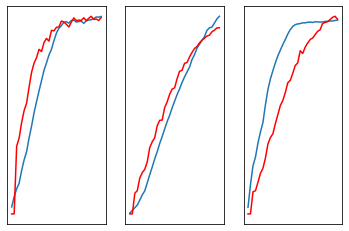

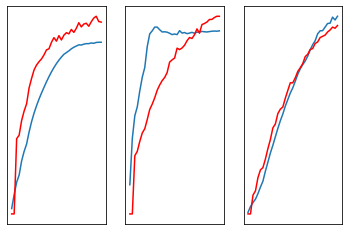

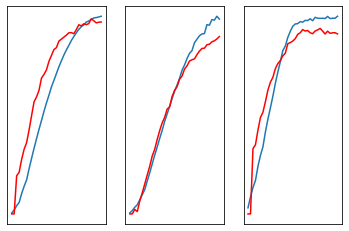

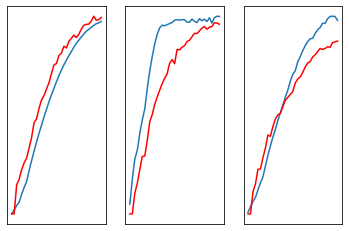

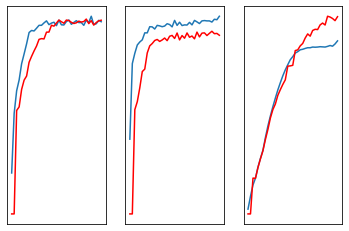

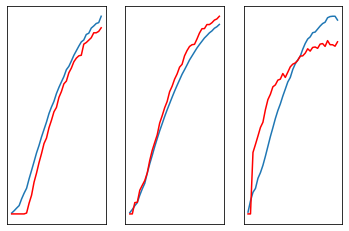

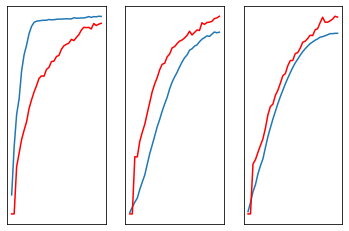

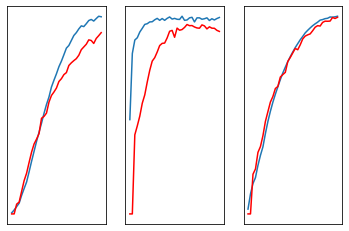

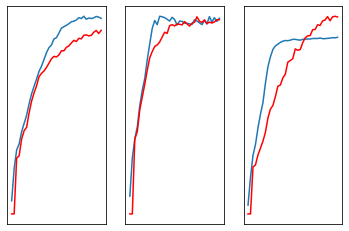

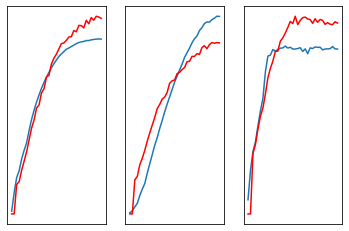

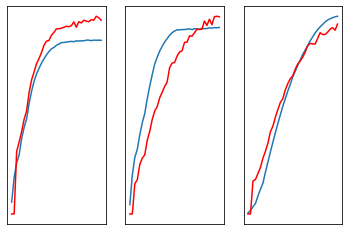

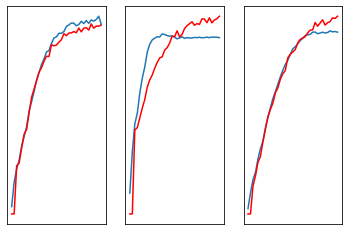

In [56]:
import matplotlib.pyplot as plt
import numpy as np



x1 = np.array(time).flatten()
for t in range(len(y_test100)):  
  y1 = y_test100[t]
  if t % 3 == 0:
    plt.figure()
  plt.subplot(1, 3, t%3+1)
  plt.tick_params(  
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left = False,
    right = False,
    labelbottom=False,
    labelleft=False)
  plt.plot(x1, y1)
  plt.plot(x1, pre100[t], color="red")

In [57]:
import math

f = 0
for i in range(len(pre100)):
  s = 0
  for j in range(len(pre100[i])):
    s = s + (y_test100[i][j] - pre100[i][j]) ** 2
   
  f2 = 50 * math.log(((1 + 1/len(pre100[i]) * s) ** -0.5)*100,10)
  f = f + f2
  
f3 = f / len(pre100)

In [58]:
f3

48.31445953211032